# **MACHINE LEARNING PROYECT**

#### JOSÉ CARLOS MONESCILLO CALZADO

# Importación de librerías

In [ ]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import metrics
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from numpy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from boruta import BorutaPy
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import scikitplot as skplt
from sklearn.svm import SVC
from scipy.stats import uniform
import funciones_auxiliares as fa
import scikitplot as skplt
import shap
import joblib


from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
    silhouette_score, recall_score, precision_score, \
    roc_auc_score, f1_score, precision_recall_curve, accuracy_score, \
    mean_squared_error, r2_score, ConfusionMatrixDisplay


from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel


seed=123


# Lectura de datasets

In [4]:
pd_loan_train = pd.read_csv("./train_pd_data_preprocessing_missing_outlier.csv").set_index(['SK_ID_CURR'])
pd_loan_test = pd.read_csv("./test_pd_data_preprocessing_missing_outlier.csv").set_index(['SK_ID_CURR'])

C:\Users\Jose Carlos\AppData\Local\Temp\ipykernel_16380\944324200.py:1: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  pd_loan_train = pd.read_csv("./train_pd_data_preprocessing_missing_outlier.csv").set_index(['SK_ID_CURR'])


In [5]:
pd_loan_test.columns

Index(['Unnamed: 0', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       ...
       'FLAG_MOBIL', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED',
       'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE', 'NAME_HOUSING_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'TARGET'],
      dtype='object', length=122)

In [6]:
pd_loan_train = pd_loan_train.drop(columns='Unnamed: 0')
pd_loan_test = pd_loan_test.drop(columns='Unnamed: 0')

In [7]:
pd_loan_train.head()

,COMMONAREA_AVG,COMMONAREA_MODE,COMMONAREA_MEDI,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MEDI,FONDKAPREMONT_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,...,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
373730,0.0211,0.0191,0.0209,0.0,0.0,0.0,reg oper account,0.0342,0.0336,0.0367,...,1,-4107,-11719.0,-472,-21057,0.018634,House / apartment,Separated,Higher education,0
127373,0.0211,0.0191,0.0209,0.0,0.0,0.0,No disponible,0.0761,0.0756,0.0771,...,1,-4808,-2921.0,-239,-15354,0.010032,House / apartment,Married,Higher education,0
265403,0.0211,0.0191,0.0209,0.0,0.0,0.0,No disponible,0.0761,0.0756,0.0771,...,1,-1565,-6189.0,-1421,-18011,0.035792,House / apartment,Married,Secondary / secondary special,0
441442,0.0211,0.0191,0.0209,0.0,0.0,0.0,No disponible,0.0761,0.0756,0.0771,...,1,-2442,-2438.0,-856,-11159,0.035792,House / apartment,Married,Secondary / secondary special,0
238432,0.0211,0.0191,0.0209,0.0,0.0,0.0,No disponible,0.0761,0.0756,0.0771,...,1,-4105,-547.0,-467,-15959,0.018209,House / apartment,Married,Secondary / secondary special,0


In [8]:
pd_loan_train.shape

(246008, 121)

In [9]:
pd_loan_train.index.is_unique

True

In [10]:
pd_loan_train.columns

Index(['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MODE',
       ...
       'FLAG_MOBIL', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED',
       'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE', 'NAME_HOUSING_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'TARGET'],
      dtype='object', length=121)

# Codificación de variables categóricas

In [11]:
cat_vars = pd_loan_train.select_dtypes(include=['object']).columns # Definimos las variables categóricas que tenemos
list_cat_vars = list(cat_vars) # Lo convierto en lista para poder trabajar con ellas posteriormente
unicos = pd_loan_train[cat_vars].nunique() # Observamos cuántos valores únicos tenemos por variable
unicos

FONDKAPREMONT_MODE             5
FLOORSMIN_MODE                26
FLOORSMIN_MEDI                48
ELEVATORS_MODE                27
ELEVATORS_MEDI                47
WALLSMATERIAL_MODE             8
ENTRANCES_MEDI                47
ENTRANCES_MODE                31
HOUSETYPE_MODE                 4
FLOORSMAX_MEDI                49
FLOORSMAX_MODE                26
EMERGENCYSTATE_MODE            3
OCCUPATION_TYPE               19
AMT_REQ_CREDIT_BUREAU_WEEK    10
AMT_REQ_CREDIT_BUREAU_HOUR     6
AMT_REQ_CREDIT_BUREAU_MON     25
AMT_REQ_CREDIT_BUREAU_QRT     11
AMT_REQ_CREDIT_BUREAU_DAY      9
AMT_REQ_CREDIT_BUREAU_YEAR    25
NAME_TYPE_SUITE                8
DEF_30_CNT_SOCIAL_CIRCLE       9
OBS_60_CNT_SOCIAL_CIRCLE      33
OBS_30_CNT_SOCIAL_CIRCLE      33
DEF_60_CNT_SOCIAL_CIRCLE       8
CNT_FAM_MEMBERS               23
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
ORGANIZATION_TYPE             58
NAME_INCOME_TYPE               8
NAME_CONTR

## Separamos X e Y
Donde X es un df sin tener en cuenta la variable objetivo e Y un df solo conteniendo la variable objetivo

- He seleccionado las variables categóricas con **menos de 10 valores únicos para aplicar OneHotEncoding** porque este método crea columnas binarias para cada categoría, lo cual es manejable cuando el número de categorías es bajo. Esto permite representar las categorías de manera explícita sin introducir ningún supuesto sobre la relación con la variable objetivo.

- Por otro lado, he utilizado **Target Encoding para las variables categóricas con más de 10 valores únicos** porque este método reduce la dimensionalidad al codificar las categorías en función de su relación estadística con la variable objetivo. Esto evita el problema de crear demasiadas columnas, que puede llevar a un modelo de mayor complejidad y problemas de memoria.

In [12]:
X_train = pd_loan_train.drop('TARGET',axis=1)
X_test = pd_loan_test.drop('TARGET',axis=1)
y_train = pd_loan_train['TARGET']
y_test = pd_loan_test['TARGET']

In [13]:
list_ohe = []  # Lista vacía para almacenar variables con menos de 10 unicos
for column in list_cat_vars:
    if pd_loan_train[column].nunique() <= 10:
        list_ohe.append(column)

list_ohe

['FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'NAME_TYPE_SUITE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE']

In [14]:
len(list_ohe)

19

In [15]:
ohe = ce.OneHotEncoder(cols=list_ohe, use_cat_names=True)
ohe.fit(X_train, y_train) 

OneHotEncoder(cols=['FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE',
                    'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                    'AMT_REQ_CREDIT_BUREAU_DAY', 'NAME_TYPE_SUITE',
                    'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                    'NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE',
                    'WEEKDAY_APPR_PROCESS_START', 'NAME_HOUSING_TYPE',
                    'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE'],
              use_cat_names=True)

In [16]:
X_train_t = ohe.transform(X_train)
X_test_t = ohe.transform(X_test)

len(list(X_train_t.columns))


212

In [17]:
list_te = []  # Lista vacía para almacenar variables con menos de 10 unicos
for column in list_cat_vars:
    if pd_loan_train[column].nunique() > 10:
        list_te.append(column)

list_te

['FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'ELEVATORS_MODE',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'OCCUPATION_TYPE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'CNT_FAM_MEMBERS',
 'ORGANIZATION_TYPE']

In [18]:
# Crear una copia de los datos para no modificar los originales
X_train_encoded = X_train_t.copy()
X_test_encoded = X_test_t.copy()

# Inicializar el TargetEncoder
target_enc = ce.TargetEncoder(cols=list_te)

# Ajustar el encoder con los datos de entrenamiento
target_enc.fit(X_train_encoded[list_te], y_train)

# Transformar las columnas seleccionadas
X_train_encoded[list_te] = target_enc.transform(X_train_t[list_te])
X_test_encoded[list_te] = target_enc.transform(X_test_t[list_te])

c:\Users\Jose Carlos\anaconda3\envs\practicaEDA\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)


In [19]:
X_train_encoded.dtypes.to_dict()

{'COMMONAREA_AVG': dtype('float64'),
 'COMMONAREA_MODE': dtype('float64'),
 'COMMONAREA_MEDI': dtype('float64'),
 'NONLIVINGAPARTMENTS_AVG': dtype('float64'),
 'NONLIVINGAPARTMENTS_MODE': dtype('float64'),
 'NONLIVINGAPARTMENTS_MEDI': dtype('float64'),
 'FONDKAPREMONT_MODE_reg oper account': dtype('int64'),
 'FONDKAPREMONT_MODE_No disponible': dtype('int64'),
 'FONDKAPREMONT_MODE_not specified': dtype('int64'),
 'FONDKAPREMONT_MODE_org spec account': dtype('int64'),
 'FONDKAPREMONT_MODE_reg oper spec account': dtype('int64'),
 'LIVINGAPARTMENTS_MEDI': dtype('float64'),
 'LIVINGAPARTMENTS_AVG': dtype('float64'),
 'LIVINGAPARTMENTS_MODE': dtype('float64'),
 'FLOORSMIN_AVG': dtype('float64'),
 'FLOORSMIN_MODE': dtype('float64'),
 'FLOORSMIN_MEDI': dtype('float64'),
 'YEARS_BUILD_AVG': dtype('float64'),
 'YEARS_BUILD_MEDI': dtype('float64'),
 'YEARS_BUILD_MODE': dtype('float64'),
 'OWN_CAR_AGE': dtype('float64'),
 'LANDAREA_MEDI': dtype('float64'),
 'LANDAREA_AVG': dtype('float64'),
 'LAND

In [20]:
X_train_encoded

,COMMONAREA_AVG,COMMONAREA_MODE,COMMONAREA_MEDI,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MEDI,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_No disponible,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_Unknown,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Academic degree
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
373730,0.0211,0.0191,0.0209,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
127373,0.0211,0.0191,0.0209,0.0,0.0,0.0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
265403,0.0211,0.0191,0.0209,0.0,0.0,0.0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
441442,0.0211,0.0191,0.0209,0.0,0.0,0.0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
238432,0.0211,0.0191,0.0209,0.0,0.0,0.0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284077,0.0211,0.0191,0.0209,0.0,0.0,0.0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
308544,0.0211,0.0191,0.0209,0.0,0.0,0.0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
446295,0.0211,0.0191,0.0209,0.0,0.0,0.0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [21]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246008 entries, 373730 to 150184
Columns: 212 entries, COMMONAREA_AVG to NAME_EDUCATION_TYPE_Academic degree
dtypes: float64(62), int64(150)
memory usage: 399.8 MB


Se observa que tenemos todas nuestras variables de tipo numéricas

In [22]:
X_train_encoded.shape

(246008, 212)

Tras realizar los encodings, nuestro dataset de train cuenta con 213 columnas y 246008 registros.

# Escalado de variables

In [23]:
scaler = StandardScaler()
model_scaled = scaler.fit(X_train_encoded)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_encoded), columns=X_train_encoded.columns, index=X_train_encoded.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_encoded), columns=X_test_encoded.columns, index=X_test_encoded.index)

In [24]:
X_train_scaled.describe()

,COMMONAREA_AVG,COMMONAREA_MODE,COMMONAREA_MEDI,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MEDI,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_No disponible,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_Unknown,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Academic degree
count,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,...,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05
mean,-1.223119e-16,-3.389410e-17,1.918403e-16,-2.768427e-17,-3.702067e-17,-2.512813e-17,-8.220077e-17,6.527538e-18,3.526604e-17,-9.589127e-18,...,-1.392987e-16,8.273149e-17,5.053065e-17,7.954354e-17,1.641813e-18,1.026715e-16,2.096177e-17,-2.830525e-17,1.741640e-17,8.679315e-18
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-6.545080e-01,-6.209154e-01,-6.507466e-01,-1.002067e-01,-9.486810e-02,-9.910172e-02,-5.621899e-01,-1.470614e+00,-1.370730e-01,-1.364716e-01,...,-1.331828e+00,-4.160772e-01,-3.274012e-01,-2.344334e-01,-2.851295e-03,-5.667102e-01,-1.567843e+00,-1.857156e-01,-1.112966e-01,-2.254710e-02
25%,-1.647440e-01,-1.676299e-01,-1.658175e-01,-1.002067e-01,-9.486810e-02,-9.910172e-02,-5.621899e-01,-1.470614e+00,-1.370730e-01,-1.364716e-01,...,-1.331828e+00,-4.160772e-01,-3.274012e-01,-2.344334e-01,-2.851295e-03,-5.667102e-01,-1.567843e+00,-1.857156e-01,-1.112966e-01,-2.254710e-02
50%,-1.647440e-01,-1.676299e-01,-1.658175e-01,-1.002067e-01,-9.486810e-02,-9.910172e-02,-5.621899e-01,6.799879e-01,-1.370730e-01,-1.364716e-01,...,7.508479e-01,-4.160772e-01,-3.274012e-01,-2.344334e-01,-2.851295e-03,-5.667102e-01,6.378190e-01,-1.857156e-01,-1.112966e-01,-2.254710e-02
75%,-1.647440e-01,-1.676299e-01,-1.658175e-01,-1.002067e-01,-9.486810e-02,-9.910172e-02,-5.621899e-01,6.799879e-01,-1.370730e-01,-1.364716e-01,...,7.508479e-01,-4.160772e-01,-3.274012e-01,-2.344334e-01,-2.851295e-03,-5.667102e-01,6.378190e-01,-1.857156e-01,-1.112966e-01,-2.254710e-02
max,2.255705e+01,2.311131e+01,2.255160e+01,3.696243e+01,3.819668e+01,3.722519e+01,1.778758e+00,6.799879e-01,7.295383e+00,7.327534e+00,...,7.508479e-01,2.403400e+00,3.054356e+00,4.265604e+00,3.507178e+02,1.764570e+00,6.378190e-01,5.384576e+00,8.985000e+00,4.435160e+01


In [25]:
X_train_scaled.head()

,COMMONAREA_AVG,COMMONAREA_MODE,COMMONAREA_MEDI,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MEDI,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_No disponible,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_Unknown,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Academic degree
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
373730,-0.164744,-0.16763,-0.165817,-0.100207,-0.094868,-0.099102,1.778758,-1.470614,-0.137073,-0.136472,...,-1.331828,-0.416077,-0.327401,-0.234433,-0.002851,1.76457,-1.567843,-0.185716,-0.111297,-0.022547
127373,-0.164744,-0.16763,-0.165817,-0.100207,-0.094868,-0.099102,-0.562190,0.679988,-0.137073,-0.136472,...,0.750848,-0.416077,-0.327401,-0.234433,-0.002851,1.76457,-1.567843,-0.185716,-0.111297,-0.022547
265403,-0.164744,-0.16763,-0.165817,-0.100207,-0.094868,-0.099102,-0.562190,0.679988,-0.137073,-0.136472,...,0.750848,-0.416077,-0.327401,-0.234433,-0.002851,-0.56671,0.637819,-0.185716,-0.111297,-0.022547
441442,-0.164744,-0.16763,-0.165817,-0.100207,-0.094868,-0.099102,-0.562190,0.679988,-0.137073,-0.136472,...,0.750848,-0.416077,-0.327401,-0.234433,-0.002851,-0.56671,0.637819,-0.185716,-0.111297,-0.022547
238432,-0.164744,-0.16763,-0.165817,-0.100207,-0.094868,-0.099102,-0.562190,0.679988,-0.137073,-0.136472,...,0.750848,-0.416077,-0.327401,-0.234433,-0.002851,-0.56671,0.637819,-0.185716,-0.111297,-0.022547


Los siguientes pasos a seguir serían el **Feature Engineering**, **selección de modelo**, realización de **validación cruzada** y ajuste de **hiperparámetros**.

# Selección de variables

La selección de variables consiste en reducir el número de variables de manera que se mantengan aquellas que van a ser de utilidad para la predicción de la variable objetivo. Se deben eliminar
aquellas variables que no son relevantes para explicar la variable objetivo.

En este caso, como existe una variable objetivo se trata de un modelo supervisado y por ello, vamos a usar técnicas de selección de características supervisadas. Estas técnicas se dividen en:

- **Métodos intrínsico**s: el modelo mismo tiene la capacidad de evaluar y seleccionar características relevantes durante su entrenamiento, sin necesidad de una etapa adicional de selección. Ejemplos: **árboles de decisión** y **modelos con regularización (Lasso y Ridge)**.<p>
- ***Wrapper methods* o métodos de envoltura**: seleccionan características evaluando su impacto en el rendimiento de un modelo específico. Ejemplo: **RFE** (usa un modelo para eliminar características iterativamente) <p>
- ***Filter methods* o métodos de filtro**: seleccionan características basándose únicamente en propiedades estadísticas de los datos, sin involucrar un modelo específico. Métricas como: **coeficiente de correlación** o **chi-cuadrado.**

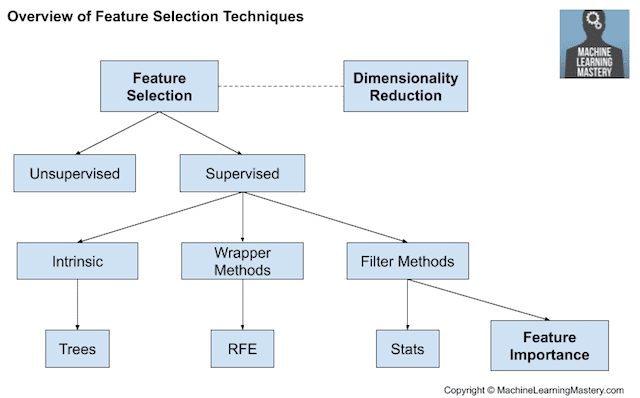

Fuente: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

# Lasso

Método de regresión lineal regularizada que utiliza la **penalización L1** para reducir la complejidad del modelo y realizar selección de características.
Este método trata de **minimizar** la siguiente **función de costo**: <p>
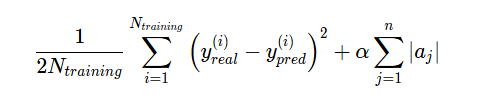 <p>

Se trata del **error cuadrático medio** más el término de regularización L1. Este término de regularización penaliza el modelo sumando valores absolutos de los coeficientes. α es el parámetro de penalización y aj los coeficientes.

In [26]:
# Se crea el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalado de las variables
    ('lasso_cv', LassoCV(cv=10, max_iter=500, random_state=seed)) # Aplicamos el Lasso, se hacen 10 particiones para la validación cruzada y máximo de iteraciones = 500.
])


In [27]:
# Se entrena el modelo
pipeline.fit(X_train_scaled, y_train)


c:\Users\Jose Carlos\anaconda3\envs\practicaEDA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.854977988601604, tolerance: 1.6436078172776925
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Jose Carlos\anaconda3\envs\practicaEDA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.68729222886941, tolerance: 1.645955228154474
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Jose Carlos\anaconda3\envs\practicaEDA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.295485870134144, tolerance: 1.645955228154474
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Jose Carlos\ana

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso_cv', LassoCV(cv=10, max_iter=500, random_state=123))])

In [28]:
# Se obtiene el mejor valor de alpha
best_alpha = pipeline.named_steps['lasso_cv'].alpha_
print(f"Mejor valor de alpha: {best_alpha}")

# Obtenemos los coeficientes 
coef = pipeline.named_steps['lasso_cv'].coef_
print("Coeficientes seleccionados:", coef)

Mejor valor de alpha: 0.00010089909146793096
Coeficientes seleccionados: [-0.00000000e+00 -0.00000000e+00 -2.48049704e-04 -0.00000000e+00
  3.74695372e-04 -0.00000000e+00  1.15843713e-03 -0.00000000e+00
  1.03897933e-04 -0.00000000e+00 -2.89865296e-04  5.22885625e-04
  0.00000000e+00  0.00000000e+00  1.12232126e-03 -2.80163668e-04
  3.26111298e-03 -0.00000000e+00 -0.00000000e+00 -7.20880917e-04
  1.67614731e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -3.02272773e-05 -0.00000000e+00 -1.08568624e-02
  0.00000000e+00 -7.30935688e-04  0.00000000e+00 -8.69379209e-04
  7.86135322e-04  1.47372656e-03  2.02593746e-03 -3.36336731e-03
  4.92760484e-04 -0.00000000e+00  1.82436853e-04  1.27630605e-04
 -1.34598867e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  3.48774532e-03 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.21403785e-03  7.04405184e-04 -0.00000000e+00  6.08753236e-03
 -0.00000000e+00 

In [29]:
# Obtener los coeficientes y las variables asociadas
coefficients = pipeline.named_steps['lasso_cv'].coef_
variables = X_train_scaled.columns  # Asegúrate de que este corresponde a tus nombres de variables

# Crear un DataFrame con los coeficientes y sus variables
coef_df = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coefficients
})

# Ordenar por el valor absoluto de los coeficientes en orden descendente
coef_df_sorted = coef_df.reindex(coef_df['Coeficiente'].abs().sort_values(ascending=False).index)

# Mostrar los coeficientes ordenados
print(coef_df_sorted)


                         Variable  Coeficiente
123               AMT_GOODS_PRICE    -0.063223
156                    AMT_CREDIT     0.057877
66                   EXT_SOURCE_3    -0.035755
122                  EXT_SOURCE_2    -0.032241
157             ORGANIZATION_TYPE     0.011159
..                            ...          ...
62         EMERGENCYSTATE_MODE_No    -0.000000
60    YEARS_BEGINEXPLUATATION_AVG    -0.000000
59   YEARS_BEGINEXPLUATATION_MODE    -0.000000
56                 FLOORSMAX_MODE    -0.000000
106  DEF_30_CNT_SOCIAL_CIRCLE_3.0    -0.000000

[212 rows x 2 columns]


In [30]:
# Definimos una variable donde se selecciona aquellas variables que tienen coeficiente distinto a 0 (no seleccionamos aquellas que no son importantes)
selected_features_lasso = [feature for feature, coef in zip(X_train_scaled.columns, coef) if coef != 0]
print("Variables seleccionadas a través de L1:", selected_features_lasso)
print('--------------------------------------------------------------------------------------------------------------------------------')
print('Total de variables: ', len(selected_features_lasso))


Variables seleccionadas a través de L1: ['COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'FONDKAPREMONT_MODE_reg oper account', 'FONDKAPREMONT_MODE_not specified', 'FONDKAPREMONT_MODE_reg oper spec account', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'BASEMENTAREA_AVG', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_No disponible', 'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Wooden', 'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic', 'ENTRANCES_MEDI', 'HOUSETYPE_MODE_No disponible', 'HOUSETYPE_MODE_specific housing', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE_Yes', 'OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_WEEK_0.0', 'AMT_REQ_CREDIT_BUREAU_WEEK_No disponible', 'AMT_REQ_CREDIT_BUREAU_WEEK_3.0', 'AMT_REQ_CREDIT_BUREAU_WEEK_4.0', '

LassoCV encuentra los coeficientes más relevantes para minimizar el error, eliminando automáticamente características con poca importancia (aquellas cuyos coeficientes son igual a 0).

# Ridge

**Ridge** se trata de otro modelo de regresión lineal. Es similar a Lasso, pero en la función de costo se incluye otra penalización para **reducir el impacto de colinealidad entre variables** (que estén correlacionadas unas con otras). La **penalización** de Ridge es un término que añade a la función de costo el cuadrado de los coeficientes. Esto ayuda a reducir el sobreajuste y mejorar la estabilidad cuando existe **multicolinealidad**. Mi idea es realizar el Ridge sobre el dataset inicial y aplicar posteriormente un PCA.

La función de costo de Ridge es la siguiente:

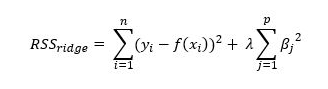

In [31]:
# Se realiza un modelo de regresión logística con Ridge usando un umbral de 0.009 (se eliminan las que están por debajo de este) y se ajustan los datos.
sel_ridge = SelectFromModel(LogisticRegression(C=1, penalty='l2', random_state=seed), threshold = 0.009)
sel_ridge.fit(X_train_scaled, y_train)

SelectFromModel(estimator=LogisticRegression(C=1, random_state=123),
                threshold=0.009)

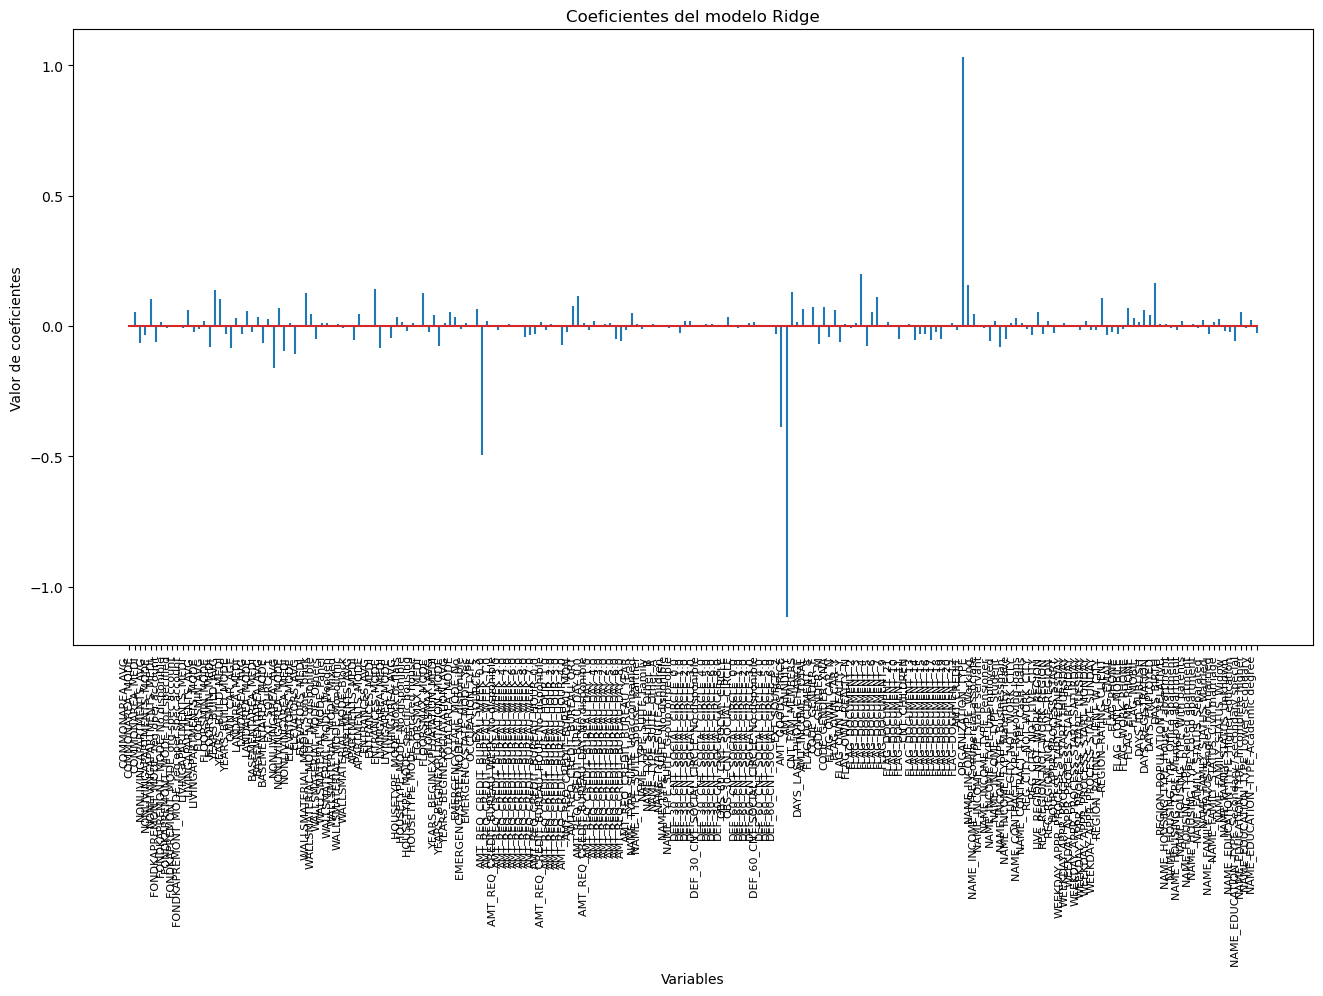

In [32]:
# Se realiza la visualización del gráfico de todos los coeficientes del modelo Ridge a través de la previa creación de un DF donde aparecen las columnas 'predictor'(nombres de las columnas de x_train) y
# coef (coeficientes del Ridge)
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train_scaled.columns,
                         'coef': sel_ridge.estimator_.coef_.flatten()}
                  )

# Se crea el gráfico
fig, ax = plt.subplots(figsize=(16, 8))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=8)
ax.set_xlabel('Variables')
ax.set_ylabel('Valor de coeficientes')
ax.set_title('Coeficientes del modelo Ridge');

Se pueden apreciar el peso (coeficiente) de cada una de las variables del modelo. Aquellas con coeficientes altos tienen una mayor influencia en el modelo mientras que las cercanas a cero tienen una influencia mínima.

In [33]:
# Se muestran las variables que han sido seleccionadas por el modelo
sel_ridge.get_support()
selected_feat = X_train_scaled.columns[sel_ridge.get_support()]
selected_feat

Index(['COMMONAREA_MODE', 'COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
       'FONDKAPREMONT_MODE_reg oper account', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_AVG',
       ...
       'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Single / not married',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Widow',
       'NAME_FAMILY_STATUS_Unknown', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Academic degree'],
      dtype='object', length=149)

In [34]:
print('total features: {}'.format((X_train_scaled.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 212
selected features: 149


A través de Ridge nos quedamos finalmente con 151 variables de las 213 iniciales.

# PCA

Tras realizar el Ridge, hemos abordado el tema de la multicolinealidad pero una buena idea es aplicar el PCA ya que nos puede ayudar a eliminar completamente la redundancia entre las variables.

Debido a que nuestro dataset sigue conteniendo muchas variables y algunas de ellas pueden estar correlacionadas, el PCA nos permite reducir el numero de variables a la vez que se conserva la mayor parte de la información, es por esto, que se decide realizar un PCA. 

Se trata de una **técnica de reducción de dimensionalidad** (reducción de columnas) que transforma un conjunto de variables posiblemente correlacionadas en un conjunto más pequeño de variables no correlacionadas llamadas **componentes principales**.

### `Pasos para realizar el PCA`

1. **Estandarización de los datos**: en nuestro caso ya los tenemos estandarizados de pasos previos.
2. Cálculo de la **matriz de covarianzas**.
3. Calcular **autovectores y autovalores**.
4. Ordenar autovectores. 
5. Calcular la **varianza explicada** y mostrarla frente a la **varianza mostrada acumulada** (cum_sum)
6. Calcular **componentes principales**


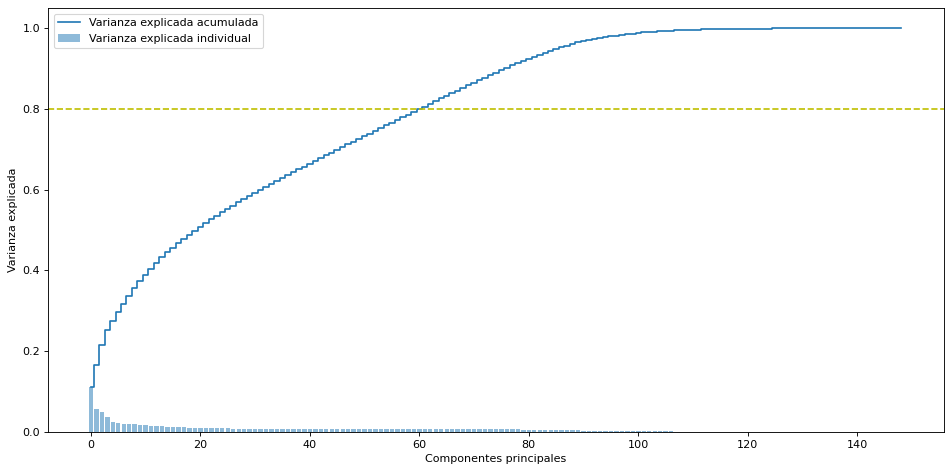

In [35]:
# Matriz de covarianzas
cov_matrix = np.cov(X_train_scaled[selected_feat], rowvar=False)

# Se calculan autovalores y autovectores
egnvalues, egnvectors = eigh(cov_matrix)
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]

# Se grafica la varianza explicada frente a la varianza explicada acumulada
threshold=0.8 # Se establece el umbral en 0.8
plt.figure(figsize=(12, 6), dpi=80)
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Varianza explicada acumulada')
plt.axhline(y=threshold, color='y', linestyle='--')
plt.ylabel('Varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

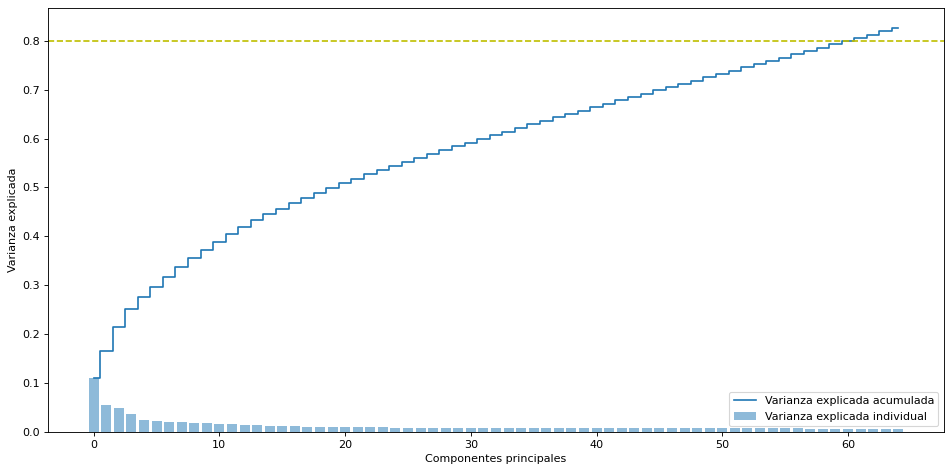

In [36]:
# Se realiza para fijando el número de componentes a 65
pca = PCA(n_components=65)

# Ajustamos el modelo
pca.fit(X_train_scaled[selected_feat]) 

# Se transforman los datos de entrenamiento y prueba
X_train_pca = pca.transform(X_train_scaled[selected_feat]) 
X_test_pca = pca.transform(X_test_scaled[selected_feat])

# Se calcula la varianza explicada por componente
exp_var_pca = pca.explained_variance_ratio_

# Se calcula la varianza explicada acumulada
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Se realiza el gráfico con umbral en 0.8
threshold = 0.8
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Varianza explicada acumulada')
plt.axhline(y=threshold, color='y', linestyle='--')

plt.ylabel('Varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [37]:
# Accedemos a los pesos de los componentes principales
main_comp = pd.DataFrame(
    pca.components_, 
    columns=selected_feat,  # Las variables originales
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Sumamos los valores absolutos de los pesos de cada variable para analizar su importancia general
feature_imp = main_comp.abs().sum().sort_values(ascending=False)

# Seleccionamos las 65 variables más relevantes
selected_features_pca = feature_imp.head(65).index
selected_features_pca


Index(['NAME_INCOME_TYPE_Businessman', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_13',
       'NAME_FAMILY_STATUS_Single / not married', 'FLAG_DOCUMENT_10',
       'WALLSMATERIAL_MODE_Others', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_15',
       'AMT_REQ_CREDIT_BUREAU_DAY_6.0', 'NAME_INCOME_TYPE_Unemployed',
       'NAME_EDUCATION_TYPE_Academic degree', 'FLAG_DOCUMENT_16',
       'NAME_INCOME_TYPE_Maternity leave', 'FLAG_DOCUMENT_4',
       'DEF_60_CNT_SOCIAL_CIRCLE_6.0', 'NAME_FAMILY_STATUS_Widow',
       'NAME_FAMILY_STATUS_Separated', 'FLAG_DOCUMENT_8',
       'AMT_REQ_CREDIT_BUREAU_WEEK_8.0', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_2',
       'NAME_INCOME_TYPE_Student', 'NAME_FAMILY_STATUS_Civil marriage',
       'DEF_60_CNT_SOCIAL_CIRCLE_3.0', 'NAME_FAMILY_STATUS_Unknown',
       'CODE_GENDER_XNA', 'AMT_REQ_CREDIT_BUREAU_HOUR_4.0', 'FLAG_EMAIL',
       'FLAG_DOCUMENT_20', 'WEEKDAY_APPR_PROCESS_START_SUNDAY',
       'DAYS_LAST_PHONE_CHANGE', 'NAME_EDUCATION_TYPE_Lower secondary',
       'CNT_FAM_MEMBE

# Random Forest


Otra opción para realizar la selección de variables es emplear el **modelo de Random Forest**, aprovechando su capacidad de calcular las **feature importances**. Se ha decidido la elección de este modelo en lugar de un Decision Tree porque combina múltiples árboles de decisión a través del *bagging* lo que reduce el riesgo de *overfitting* y proporciona estimaciones más robustas de las feature importances.

Esta técnica asigna un peso a cada variable según su contribución a la predicción del modelo, lo que nos permitirá identificar las variables más relevantes para el problema. Posteriormente, con la información que nos ofrece este método más la de los anteriores podremos tomar una decisión en cuanto a la elección de las variables.

Esto nos ayudará a mejorar la eficiencia y rendimiento, reduciendo el ruido y el riesgo de *overfitting*.

In [38]:
# Creamos el Random Forest con los parámetros personalizados: peso de las clases balanceado puesto que nuestros datos están desbalanceados y nuestra semilla.
rf = RandomForestClassifier(class_weight='balanced', random_state=seed) 

# Se entrena el modelo con los datos escalados y las etiquetas.
rf.fit(X_train_scaled, y_train) 

RandomForestClassifier(class_weight='balanced', random_state=123)

In [39]:
# Se crea un dataframe con las columnas "feature" e "importance" que son asociadas al nombre de las columnas de x_train_scaled y la importancia calculada en el modelo respectivamente.
importances = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': rf.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

print("Importancia de características (Random Forest):")
print(importances)

Importancia de características (Random Forest):
                            Feature  Importance
122                    EXT_SOURCE_2    0.066159
66                     EXT_SOURCE_3    0.065651
193                      DAYS_BIRTH    0.034938
190                 DAYS_ID_PUBLISH    0.031723
191               DAYS_REGISTRATION    0.030981
..                              ...         ...
155                FLAG_DOCUMENT_12    0.000000
82   AMT_REQ_CREDIT_BUREAU_HOUR_4.0    0.000000
206      NAME_FAMILY_STATUS_Unknown    0.000000
121    DEF_60_CNT_SOCIAL_CIRCLE_6.0    0.000000
111    DEF_30_CNT_SOCIAL_CIRCLE_8.0    0.000000

[212 rows x 2 columns]


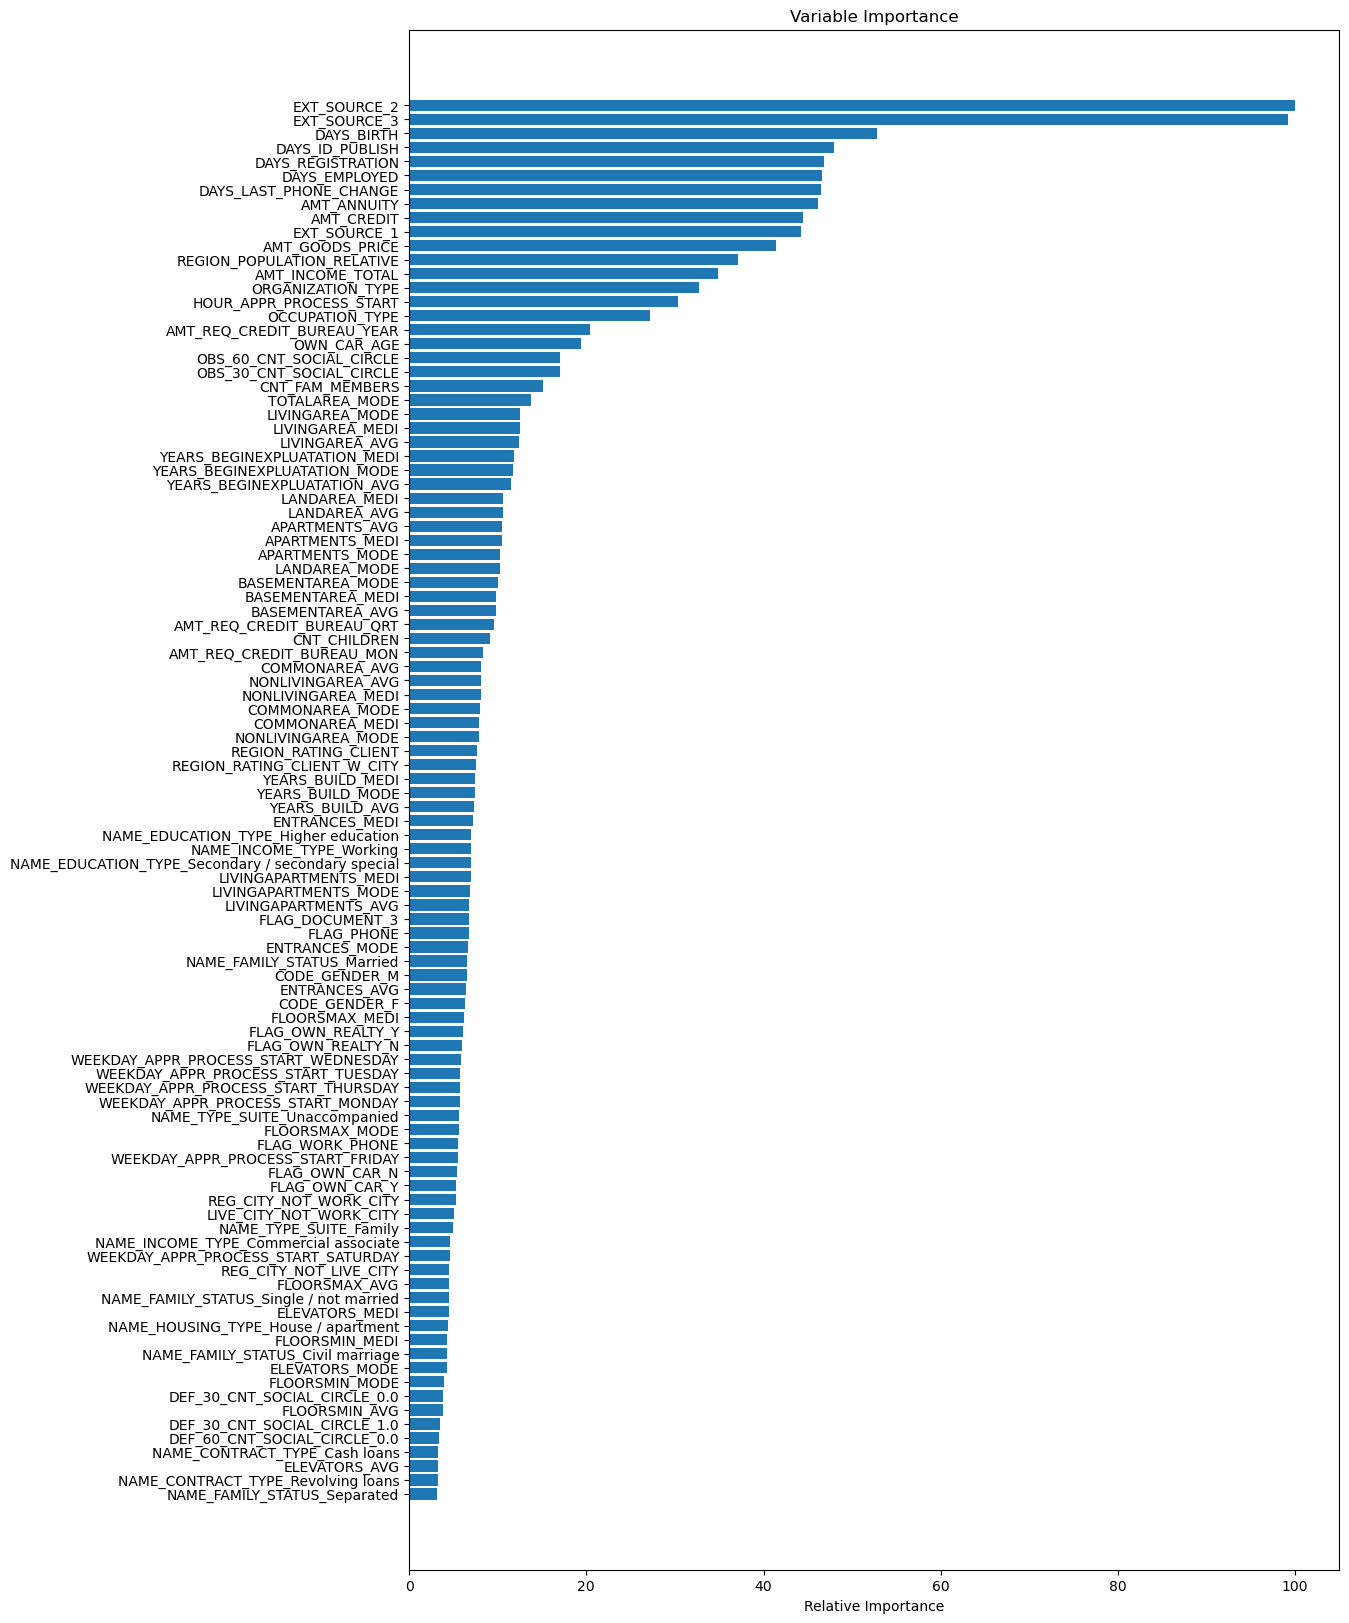

In [40]:
# Se define la variable feature_importance, se normalizan las importancias para que estén en escala del 0 al 100 y se ordenan de mayor a menor.
feature_importance = rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-100:]
pos = np.arange(sorted_idx.shape[0]) + .5 # posicionamiento del eje

# Se realiza el gráfico
plt.figure(figsize=(12, 20))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_scaled.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()

In [41]:
# Umbral de importancia relativa 
importance_threshold = 6

# Crear un DataFrame con las importancias y las variables
importances_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': feature_importance
})

# Filtrar las variables que superen el umbral
selected_features_rf = importances_df.loc[importances_df['Importance'] > importance_threshold, 'Feature']

# Convertirlo a lista
selected_features_rf = selected_features_rf.tolist()

# Mostrar las variables seleccionadas
print("Variables seleccionadas por Random Forest (Feature Importance): ", len(selected_features_rf))
print(selected_features_rf)


Variables seleccionadas por Random Forest (Feature Importance):  67
['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_

# Boruta

Se trata de un **algoritmo para la selección de variables** que trata de determinar las variables más relevantes **con el fin de predecir un objetivo**. Para ello, elimina las irrelevantes o redundantes. Está diseñado para trabajar con modelos basados en **árboles**. Puesto que tenemos un problema de clasificación, Boruta es una opción a tener en cuenta.

Aprovecho que he realizado el modelo de RandomForest para calcular la featureimportances_ y también calculo el Boruta para ese modelo. 

In [ ]:
# Se crea Boruta sobre el RandomForest
boruta_selector = BorutaPy(estimator=rf, n_estimators='auto', random_state=seed)

# Se ajusta el modelo
boruta_selector.fit(X_train_scaled.values, y_train.values)

In [ ]:
# Se obtienen las variables seleccionadas
selected_features_boruta = X_train_scaled.columns[boruta_selector.support_]

print('Caracteristicas seleccionadas por Boruta:')
print(selected_features_boruta)

Caracteristicas seleccionadas por Boruta:
Index(['EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_ANNUITY',
       'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH'],
      dtype='object')


Estas son las variables que Boruta ha seleccionado como más relevantes para predecir la variable objetivo.

Se crea un dataframe para ver cuáles son las variables que ha escogido cada uno de los métodos utilizados.

In [ ]:
# Lista completa de variables
all_features = X_train_scaled.columns

# Crear el DataFrame base con todas las variables
feature_selection_df = pd.DataFrame({'Variable': all_features})

# Agregar columnas indicando si la variable fue seleccionada por cada método
feature_selection_df['PCA'] = feature_selection_df['Variable'].isin(selected_features_pca).astype(int)
feature_selection_df['Boruta'] = feature_selection_df['Variable'].isin(selected_features_boruta).astype(int)
feature_selection_df['Lasso'] = feature_selection_df['Variable'].isin(selected_features_lasso).astype(int)
feature_selection_df['Random_Forest'] = feature_selection_df['Variable'].isin(selected_features_rf).astype(int)

# Mostrar el DataFrame
feature_selection_df

,Variable,PCA,Boruta,Lasso,Random_Forest
0,COMMONAREA_AVG,0,0,0,1
1,COMMONAREA_MODE,1,0,0,1
2,COMMONAREA_MEDI,1,0,1,1
3,NONLIVINGAPARTMENTS_AVG,0,0,0,0
4,NONLIVINGAPARTMENTS_MODE,0,0,1,0
...,...,...,...,...,...
207,NAME_EDUCATION_TYPE_Higher education,0,0,0,1
208,NAME_EDUCATION_TYPE_Secondary / secondary special,1,0,1,1
209,NAME_EDUCATION_TYPE_Incomplete higher,0,0,1,0
210,NAME_EDUCATION_TYPE_Lower secondary,1,0,1,0


Se añade una columna adicional que nos aporte la información de si la variable ha sido seleccionada por todas las técnicas empleadas de selección de variable.

In [ ]:
# Agregar una nueva columna que indique si fue seleccionada por todos los métodos
feature_selection_df['Selected_by_all'] = (feature_selection_df[['PCA', 'Boruta', 'Lasso', 'Random_Forest']].sum(axis=1) == 4).astype(int)

feature_selection_df


,Variable,PCA,Boruta,Lasso,Random_Forest,Selected_by_all
0,COMMONAREA_AVG,0,0,0,1,0
1,COMMONAREA_MODE,1,0,0,1,0
2,COMMONAREA_MEDI,1,0,1,1,0
3,NONLIVINGAPARTMENTS_AVG,0,0,0,0,0
4,NONLIVINGAPARTMENTS_MODE,0,0,1,0,0
...,...,...,...,...,...,...
207,NAME_EDUCATION_TYPE_Higher education,0,0,0,1,0
208,NAME_EDUCATION_TYPE_Secondary / secondary special,1,0,1,1,0
209,NAME_EDUCATION_TYPE_Incomplete higher,0,0,1,0,0
210,NAME_EDUCATION_TYPE_Lower secondary,1,0,1,0,0


In [ ]:
feature_selection_df[feature_selection_df['Selected_by_all'] == 1]

,Variable,PCA,Boruta,Lasso,Random_Forest,Selected_by_all
66,EXT_SOURCE_3,1,1,1,1,1


La única variable que ha sido seleccionada por todos es 'EXT_SOURCE_3'. Por ello, voy a realizar otro filtro donde me aparezcan aquellas que han sido seleccionadas por al menos 3 o más.

In [ ]:
# Filtrar las variables seleccionadas por al menos 3 métodos
selected_by_three_or_more = feature_selection_df[feature_selection_df[['PCA', 'Boruta', 'Lasso', 'Random_Forest']].sum(axis=1) >= 3]

selected_by_three_or_more


,Variable,PCA,Boruta,Lasso,Random_Forest,Selected_by_all
2,COMMONAREA_MEDI,1,0,1,1,0
27,EXT_SOURCE_1,0,1,1,1,0
66,EXT_SOURCE_3,1,1,1,1,1
122,EXT_SOURCE_2,0,1,1,1,0
124,AMT_ANNUITY,0,1,1,1,0
125,CNT_FAM_MEMBERS,1,0,1,1,0
126,DAYS_LAST_PHONE_CHANGE,1,0,1,1,0
129,CODE_GENDER_F,1,0,1,1,0
130,CODE_GENDER_M,1,0,1,1,0
137,FLAG_DOCUMENT_3,1,0,1,1,0


In [ ]:
# Creamos una lista con las variables 
selected_variables_list = selected_by_three_or_more['Variable'].tolist()

print('Las variables finalmente seleccionadas son: ', len(selected_variables_list))
print(selected_variables_list)

Las variables finalmente seleccionadas son:  19
['COMMONAREA_MEDI', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_DOCUMENT_3', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'FLAG_PHONE', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'NAME_FAMILY_STATUS_Married', 'NAME_EDUCATION_TYPE_Secondary / secondary special']


Estas variables han sido seleccionadas porque se consideran relevantes para el problema en cuestión según al menos tres métodos distintos de selección de características: PCA, Boruta, Lasso y Random Forest (feature importance). Este enfoque permite identificar aquellas variables que tienen un impacto significativo en el modelo, independientemente de las particularidades de cada técnica de selección.

Desde el punto de vista del negocio, esto es crucial porque:

- Las variables seleccionadas por varios métodos indican una fuerte relación con la variable objetivo (como riesgo de crédito, retención de clientes, etc.), lo que las hace más confiables para la toma de decisiones.

- Reducción de complejidad: al enfocarnos en estas variables, reducimos el ruido de datos irrelevantes o redundantes, lo que mejora la interpretabilidad del modelo y permite centrar los recursos en los factores más importantes para el negocio.

- Optimización de recursos: al tener un conjunto más pequeño y confiable de variables, las estrategias de negocio pueden dirigirse mejor. 

- Mejora de resultados del modelo: las variables elegidas no solo optimizan el rendimiento del modelo, sino que también proporcionan información clave para el análisis estratégico. Por ejemplo, si EXT_SOURCE_1, EXT_SOURCE_2, y EXT_SOURCE_3 (factores externos) son importantes, podría sugerir que los datos externos (como calificaciones de crédito externas) juegan un papel crucial en el caso de negocio.

In [ ]:
# Filtramos el dataset con las variables seleccionadas
X_train_selected = X_train_scaled[selected_variables_list]
X_test_selected = X_test_scaled[selected_variables_list]

# SMOTE

Decido aplicar SMOTE (Synthetic Minority Oversampling Technique) antes de realizar la selección del modelo. Considero que es una buena estrategia ya que es adecuada en problemas de clasificación desbalanceada, como en este caso. Trata de balancear las clases al generar ejemplos sintéticos para la clase minoritaria, reduciendo el sesgo hacia la clase mayoritaria.

En este contexto, SMOTE asegura que las variables seleccionadas sean representativas y que el modelo sea más robusto, alineándose con los objetivos del negocio al garantizar una mejor detección de la clase minoritaria, que en nuestro caso, al ser los clientes que no pagan o se retrasan al pagar el préstamo, es la más relevante.

In [ ]:
# Aplicar SMOTE
smote = SMOTE(random_state=seed)
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)

# Verificar el balanceo de clases
print("Distribución de clases antes de SMOTE:")
print(y_train.value_counts())

print("\nDistribución de clases después de SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Distribución de clases antes de SMOTE:
TARGET
0    226148
1     19860
Name: count, dtype: int64

Distribución de clases después de SMOTE:
TARGET
0    226148
1    226148
Name: count, dtype: int64


Se observa que se han balanceado las clases.

In [ ]:
# Se crea una submuestra de 5000 registros para aplicar el modelo SVM debido a la limitación de recursos computacionales
subset_x_train = X_train_smote.sample(n=5000, random_state=seed)
subset_y_train = y_train_smote.loc[subset_x_train.index]
subset_x_test = X_test_selected.sample(n=5000, random_state=seed)
subset_y_test = y_test.loc[subset_x_test.index] 


# SVM

In [ ]:
# Crear y entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=seed)  # Se puede cambiar 'linear' por 'rbf', 'poly', etc.
svm_model.fit(subset_x_train, subset_y_train)

# Predicciones en el conjunto de test
y_pred_svm = svm_model.predict(subset_x_test)

# Evaluación del modelo
print("Matriz de Confusión:")
print(confusion_matrix(subset_y_test, y_pred_svm))
print("\nReporte de Clasificación:")
print(classification_report(subset_y_test, y_pred_svm))
print("\nAccuracy:", accuracy_score(subset_y_test, y_pred_svm))

Matriz de Confusión:
[[3218 1383]
 [ 143  256]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      4601
           1       0.16      0.64      0.25       399

    accuracy                           0.69      5000
   macro avg       0.56      0.67      0.53      5000
weighted avg       0.89      0.69      0.76      5000


Accuracy: 0.6948


Antes de analizar los resultados vamos a resumir brevemente en qué consiste cada una de las métricas.

## Matriz de confusión

La matriz de confusión es una tabla que se utiliza para evaluar el rendimiento de un modelo. Muestra la cantidad de predicciones correctas e incorrectas desglosadas por cada clase, ayudándonos a entender dónde está fallando el modelo.



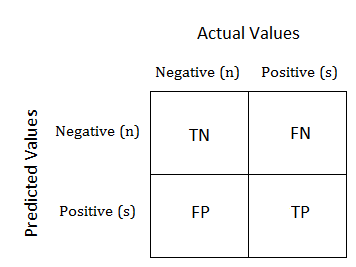

Fuente: https://bookdown.org/f_izco/BDC-POC/metricas.html 

Primeramente, hay que aclarar que para analizar nuestro modelo, consideramos positivos aquellos clientes que no pagarán el préstamo mientras que los negativos son los que sí pagarán.


## Accuracy
Mide el porcentaje de predicciones correctas sobre el total de predicciones realizadas

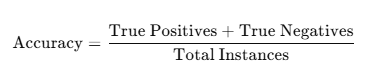

## Recall

Mide la capacidad del modelo para encontrar todos los casos positivos reales (qué porcentaje de los positivos reales fue identificado correctamente). En nuestro caso los positivos reales son aquellos clientes que el modelo predice que no devuelven el préstamo y realmente no lo devuelven.

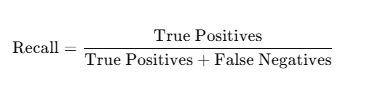

## F1 Score

Mide el balance entre precisión (qué tan correcto es el modelo en sus predicciones positivas) y recall (qué tanto identifica los positivos reales).

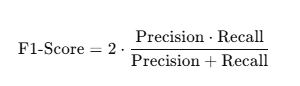

En cuanto al resultado del modelo SVM:

La clase 0 (mayoritaria) se predice con bastante precisión (3218 verdaderos positivos frente a 1383 falsos positivos).
La clase 1 (minoritaria) tiene peores resultados, con solo 256 verdaderos positivos frente a 143 falsos negativos.

**Precisión**:

Clase 0: 96% (indica que la mayoría de las predicciones positivas para esta clase son correctas).
Clase 1: 16%, bastante baja.

**Recall**:

Clase 0: 70%, lo que significa que el modelo detecta la mayoría de los ejemplos positivos de esta clase.
Clase 1: 64%, indicando que el modelo no detecta bien los ejemplos de esta clase.

**F1-Score**:

Más bajo para la clase 1 (25%), indicando un balance deficiente entre precisión y recall.

**Soporte**:

Clase 0 tiene 4601 ejemplos, mientras que la clase 1 tiene solo 399, reflejando un dataset desbalanceado.

**Accuracy**:

El modelo tiene un 69.48% de precisión global. Sin embargo, dado el desbalance, esta métrica no refleja bien la capacidad del modelo para manejar ambas clases.


## Selección de modelo

In [ ]:
# Creamos la lista de modelos que vamos a usar
classifiers = [
    DummyClassifier(),
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    ]
# Realizamos el bucle para la aplicacion de los modelos
for classifier in classifiers:
    pipe = Pipeline(steps=[
        ('classifier', classifier)
        ])
    # Entrenar modelo
    pipe.fit(X_train_smote, y_train_smote)   
    print(classifier)

    # Realizar predicciones
    y_pred = pipe.predict(X_test_selected)

    # Calcular métricas
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred) 

    #Imprimimos todo
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {acc:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1 Score: {f1:.3f}")

    print("model score: %.3f" % pipe.score(X_test_selected, y_test))
    

DummyClassifier()

Matriz de Confusión:
[[56538     0]
 [ 4965     0]]
Accuracy: 0.919
Recall: 0.000
F1 Score: 0.000
model score: 0.919
LogisticRegression()

Matriz de Confusión:
[[38911 17627]
 [ 1679  3286]]
Accuracy: 0.686
Recall: 0.662
F1 Score: 0.254
model score: 0.686
RandomForestClassifier()

Matriz de Confusión:
[[51463  5075]
 [ 3729  1236]]
Accuracy: 0.857
Recall: 0.249
F1 Score: 0.219
model score: 0.857
GradientBoostingClassifier()

Matriz de Confusión:
[[43760 12778]
 [ 2522  2443]]
Accuracy: 0.751
Recall: 0.492
F1 Score: 0.242
model score: 0.751
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
             

Los resultados de los diferentes modelos muestarn que el RandomForestClassifier tiene la mejor precisión general (0.858). Por otro lado, el Recall de LogisticRegression (0.662) indica que identifica mejor las clases positivas que otros modelos. 

Elijo el modelo de regresión logística principalmente debido a su mayor recall en comparación con otros modelos. En nuestro caso de negocio, es fundamental identificar correctamente a los clientes que no pagarán sus préstamos (los positivos reales). Un alto recall indica que el modelo es capaz de detectar la mayoría de estos casos, minimizando los falsos negativos. Esto es crucial para el banco, ya que cada cliente no identificado que incumple el pago representa una posible pérdida financiera. Al priorizar el recall con la regresión logística, garantizamos que el modelo sea más eficaz en la detección de clientes morosos, permitiéndonos tomar medidas preventivas y reducir el riesgo crediticio.

Por otro lado, si quisieramos una alternativa más equilibrada podríamos optar por el XGBoost cuyas métricas de accuracy y recall están más proporcionadas. El Support Vector Machine es otra opción interesante que comparte valores similares al de LogisticRegression. Pero decido descartar este modelo debido a que es más costoso computacionalmente y no podría ejecutarlo con el dataset completo.


# Ajuste de hiperparámetros para Logistic Regression

In [ ]:
# Definimos la variable que contiene el modelo de regresión logística para poder aplicar el GridSearchCV
logistic_reg = Pipeline(steps=[('classifier', LogisticRegression())])

In [ ]:
# Ajustamos los valores de búsqueda de la función LogisiticRegression
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Lista de valores fijos para el hiperparámetro C
    'classifier__penalty': ['l1', 'l2'],       # Tipos de penalización
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Solvers compatibles con l1 y l2    
}


In [ ]:
# Se define el RandomizedSearchCV, usamos esta en lugar de GridSearchCV para reducir el tiempo de cálculo
random_search_lr = RandomizedSearchCV(logistic_reg, param_distributions=param_grid, n_iter=100, cv=5, random_state=seed, n_jobs=-1)

In [ ]:
# Se ajusta el modelo
random_search_lr.fit(X_train_smote, y_train_smote)


c:\Users\Jose Carlos\anaconda3\envs\practicaEDA\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Jose Carlos\anaconda3\envs\practicaEDA\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jose Carlos\anaconda3\envs\practicaEDA\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('classifier',
                                              LogisticRegression())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'classifier__C': [0.01, 0.1, 1, 10,
                                                          100],
                                        'classifier__penalty': ['l1', 'l2'],
                                        'classifier__solver': ['newton-cg',
                                                               'lbfgs',
                                                               'liblinear',
                                                               'sag', 'saga']},
                   random_state=123)

In [ ]:
print("Mejores hiperparámetros:", random_search_lr.best_params_)
print("Mejor puntaje:", random_search_lr.best_score_)

Mejores hiperparámetros: {'classifier__solver': 'liblinear', 'classifier__penalty': 'l1', 'classifier__C': 0.1}
Mejor puntaje: 0.6740497403840312


Para realizar los diferentes gráficos se usa la función que aparece en el archivo funciones_auxiliares.py. En él aparecen otras funciones que se han usado para la práctica anterior EDA y algunas que se emplean en esta. Se importan todas en la primera celda del documento "import funciones_auxiliares as fa".

In [ ]:
# Se echa un vistazo para recordar como funciona la función
help(fa.plot_model_evaluation)

Help on function plot_model_evaluation in module funciones_auxiliares:

plot_model_evaluation(model, X_test, y_test)
    Genera las siguientes gráficas:
    - Curva ROC AUC
    - Matriz de confusión (normalizada y sin normalizar)
    - Cumulative gains curve
    - Lift curve
    
    Parámetros:
    model: El modelo ya entrenado
    X_test: Features del conjunto de test
    y_test: Etiquetas reales del conjunto de test



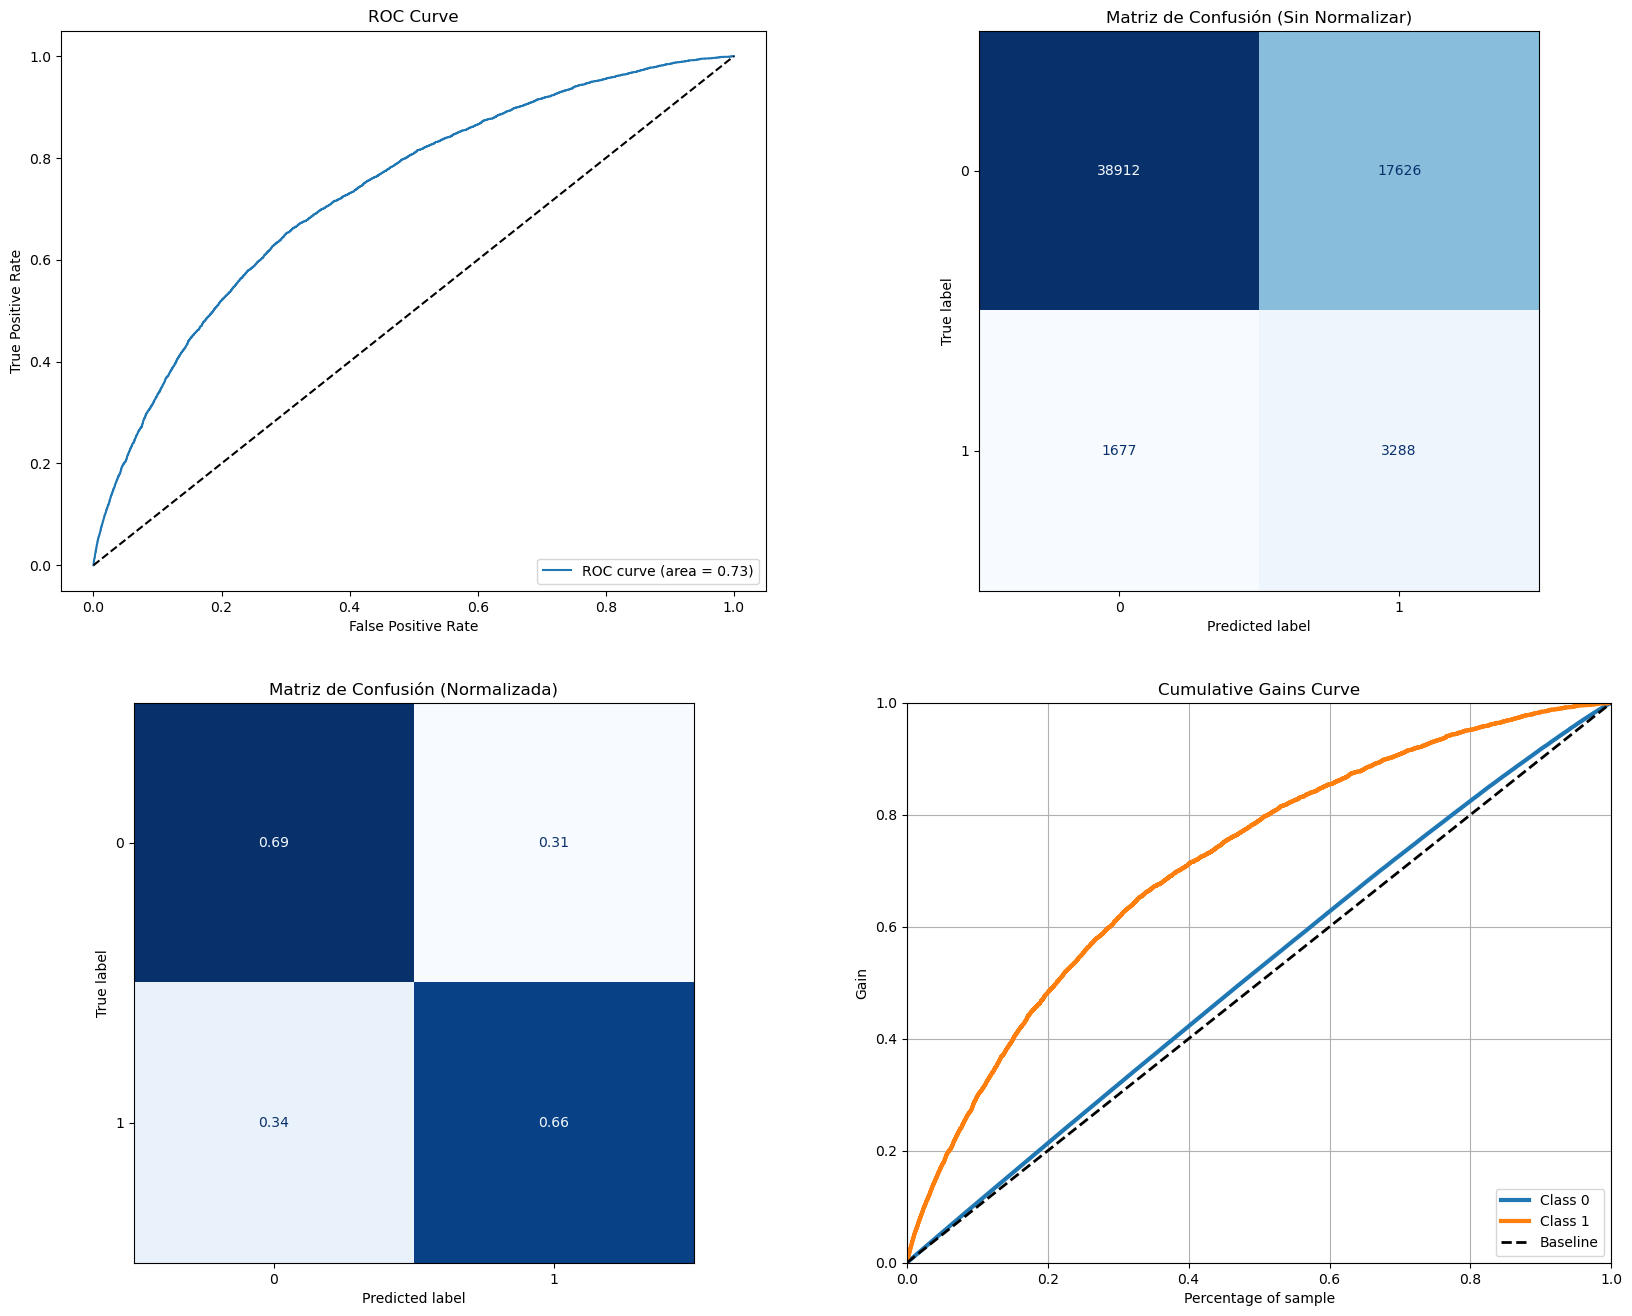

<Figure size 1000x600 with 0 Axes>

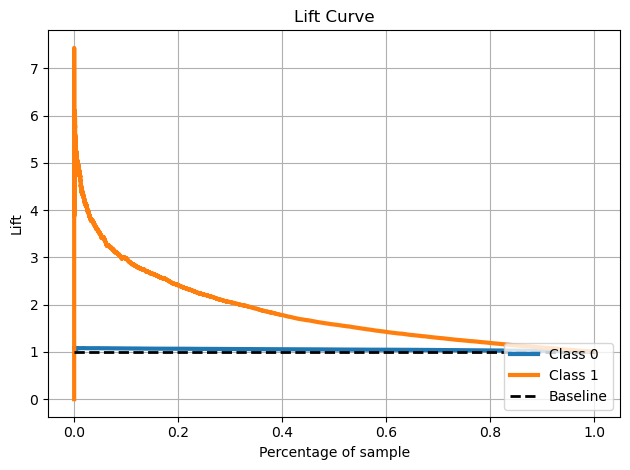

In [ ]:
# Aplicamos la función para el modelo de regresión logística
fa.plot_model_evaluation(random_search_lr.best_estimator_, X_test_selected, y_test)


**1. Curva ROC (Receiver Operating Characteristic):**

La línea naranja representa la curva ROC para el modelo, que muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a diferentes umbrales de decisión.
 
El área bajo la curva (AUC) es de 0.73, lo que indica un desempeño moderado. Esto sugiere que el modelo es razonablemente capaz de distinguir entre las dos clases, aunque no es excelente. El valor AUC indica qué tan bien el modelo distingue entre las clases. Un AUC más cercano a 1 significa un mejor desempeño, mientras que un AUC de 0.5 indica un modelo que no es mejor que el azar.

**2. Matriz de Confusión (Sin Normalizar):**

De 38,912 instancias verdaderas negativas, 16,626 fueron clasificadas erróneamente como positivas.
En el caso de la clase positiva, 3,288 instancias fueron clasificadas correctamente, mientras que 1,677 fueron clasificadas como negativas de manera incorrecta.
Esto indica que el modelo tiene un número significativo de falsos positivos y falsos negativos.

**3. Matriz de Confusión (Normalizada):**

El modelo clasifica correctamente el 69% de las instancias de la clase negativa y el 66% de las instancias de la clase positiva.
La precisión es moderada, pero el modelo tiene margen para mejorar, especialmente en la reducción de falsos positivos y falsos negativos.

**4.  Curva de Ganancias Cumulativas:**

La clase positiva tiene un comportamiento destacado al inicio, lo que indica que el modelo es útil para priorizar correctamente las instancias más relevantes.
A medida que aumenta el porcentaje de muestras, el modelo se acerca al rendimiento aleatorio.

**5. Curva de Lift:**

El lift inicial de la clase positiva es mayor a 7, lo que indica que el modelo es altamente efectivo en identificar las primeras instancias relevantes.
Sin embargo, el lift disminuye rápidamente, lo que sugiere que el beneficio del modelo es más evidente al analizar las primeras predicciones.


En resumen, el modelo de regresión logística tiene un desempeño moderado, con un AUC de 0.73 y un buen inicio en la curva de ganancias y lift. Sin embargo, los errores en la matriz de confusión destacan la necesidad de trabajar en la mejora de la precisión y recall. Compararemos con el modelo Random Forest para determinar el más adecuado

## Ajuste de umbrales 

In [ ]:
# Miramos cómo se usa la función de análisis de umbrales
help(fa.analyze_thresholds)

Help on function analyze_thresholds in module funciones_auxiliares:

analyze_thresholds(model, X_test, y_test)
    Analiza cómo cambian las métricas de rendimiento al ajustar el umbral de decisión del modelo.
    
    Parámetros:
    model: El modelo ya entrenado
    X_test: Features del conjunto de prueba
    y_test: Etiquetas reales del conjunto de prueba



c:\Users\Jose Carlos\anaconda3\envs\practicaEDA\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


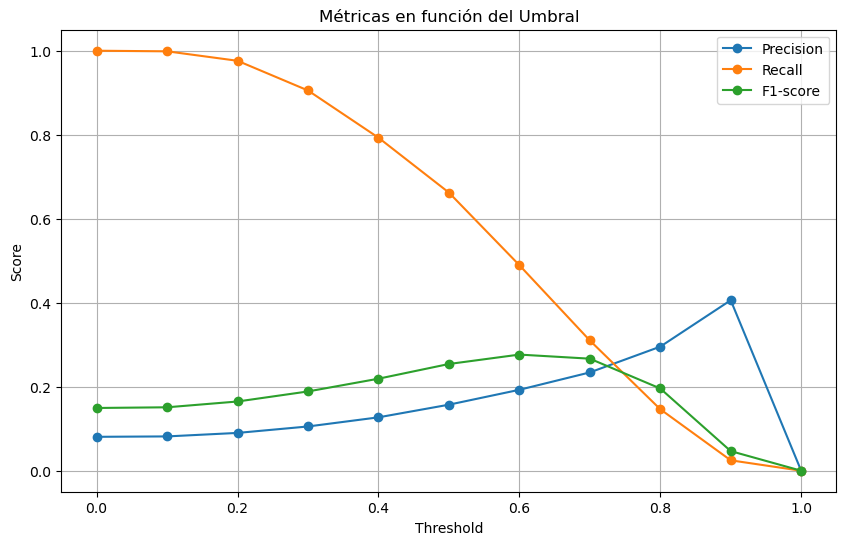

In [ ]:
# Análisis de umbrales para el modelo de regresión logística
fa.analyze_thresholds(random_search_lr.best_estimator_, X_test_selected, y_test)

En esta gráfica se muestra la relación entre el umbral de decisión y las métricas precisión, recall y F1-Score para el modelo de regresión logística. 

- **Precisión (línea azul)**: aumenta a medida que el umbral se incrementa, lo que significa que el modelo clasifica como positivas únicamente las instancias con alta certeza, reduciendo los falsos positivos.

- **Recall (línea naranja)**: disminuye conforme el umbral aumenta, ya que al ser más estricto, el modelo no captura tantos verdaderos positivos, priorizando precisión en lugar de sensibilidad.

- **F1-score (línea verde)**: muestra el balance entre precisión y recall. Se observa un valor máximo en un punto intermedio del umbral, indicando el mejor equilibrio entre ambas métricas. A medida que el umbral se aleja de este punto, el F1-score disminuye debido a la pérdida de balance.

Este análisis ilustra cómo el umbral afecta el comportamiento del modelo, permitiendo seleccionar el mejor umbral dependiendo de los objetivos del caso de negocio: mayor precisión para evitar falsos positivos o mayor recall para capturar más verdaderos positivos.


# Partial Importance Plots

Este tipo de gráficos permiten visualizar cómo las características afectan la probabilidad predicha del modelo para una clase. Es útil para entender la relación entre variables más importantes y la salida del modelo.

Nos muestra cómo cambia la predicción promedio de un modelo al modificar los valores de una característica (o un conjunto de características) mientras se mantienen fijas las demás características. Esto ayuda a identificar si una variable tiene una relación lineal, no lineal, o más compleja con el resultado.

In [ ]:
# Se echa un vistazo para recordar como se utiliza la función
help(fa.plot_partial_dependence_plots)

Help on function plot_partial_dependence_plots in module funciones_auxiliares:

plot_partial_dependence_plots(model, X_train, features)
    Genera Partial Dependence Plots para las características especificadas.
    
    Parámetros:
    model: El modelo ya entrenado
    X_train: Features del conjunto de entrenamiento
    features: Lista de características para las que se generarán los PDP



In [ ]:
# Seleccionamos las variables que queremos analizar
selected_variables_list = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_BIRTH']

<Figure size 1200x800 with 0 Axes>

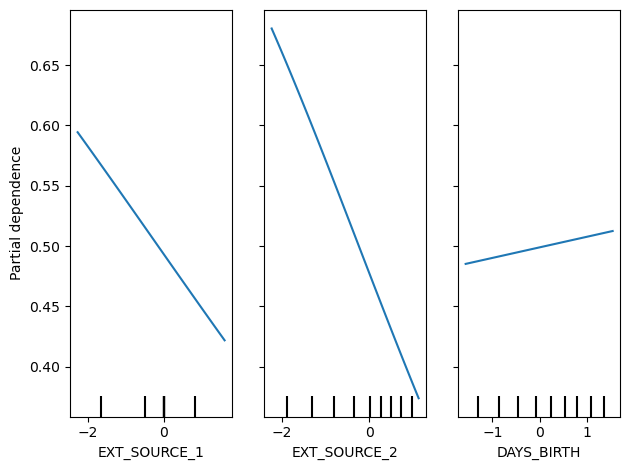

In [ ]:
# Se grafican los PDP para el modelo de regresión logística
fa.plot_partial_dependence_plots(random_search_lr.best_estimator_, X_train_smote, selected_variables_list)

Estos son los PDP de las variables EXT_SOURCE_1, EXT_SOURCE_2 y DAYS_BIRTH para el modelo de **LogisticRegression**. 

Tanto para EXT_SOURCE_1 como para EXT_SOURCE_2, se observa una relación negativa entre el valor de la variable y la probabilidad predicha por el modelo. A medida que el valor de estas variables aumenta (hacia la derecha del eje X), la probabilidad promedio predicha por el modelo disminuye. Esto indica que valores más altos de estas variables se asocian con un menor riesgo o una menor probabilidad de pertenecer a la clase positiva.

Por otro lado, en la variable DAYS_BIRTH se ve una relación positiva leve. A medida que el valor de esta variable aumenta, la probabilidad predicha por el modelo también incrementa ligeramente. Esto sugiere que, en términos relativos, valores más altos en esta variable pueden estar asociados con un mayor riesgo o una mayor probabilidad de pertenecer a la clase positiva.

Dado que DAYS_BIRTH está relacionado con la edad del cliente (en días), un valor mayor podría corresponder a personas más jóvenes(la variable presenta valores negativos). Esto podría implicar que el modelo asocia juventud con mayor riesgo.


# Explicabilidad

La explicabilidad en un modelo se refiere a la capacidad de entender y comunicar cómo y por qué el modelo toma ciertas decisiones o realiza predicciones. Esto implica identificar las variables más relevantes y cómo afectan el resultado.

In [ ]:
# Inicializar JS para SHAP
shap.initjs()  

In [ ]:
# Observamos cuales fueron los mejores hiperparámetros para el modelo de regresión logística
random_search_lr.best_params_

{'classifier__solver': 'liblinear',
 'classifier__penalty': 'l1',
 'classifier__C': 0.1}

In [ ]:
# Creamos un modelo de regresión logística con los mejores hiperparámetros pero sin Pipeline debido a que shap no funciona con Pipeline
lr_shap = sklearn.linear_model.LogisticRegression(penalty="l1", C=0.1, solver='liblinear')

# Entrenamos el modelo de nuevo
lr_shap.fit(X_train_smote, y_train_smote)


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [ ]:
# Guardar el modelo en un archivo joblib
joblib.dump(lr_shap, 'LogisticRegression.joblib')

In [ ]:
# Crear el explicador
explainer = shap.LinearExplainer(lr_shap, X_train_selected)


In [ ]:
# Calcular valores SHAP
shap_values = explainer.shap_values(X_test_selected)

# Análisis local o explicación individual

Un gráfico local en SHAP explica la contribución de las características para una observación específica del conjunto de datos, es decir, se centra en un único cliente o punto.

In [ ]:
index_to_explain = 0  # Cambia este índice para explicar otras observaciones
shap_value_local = shap_values[index_to_explain]
instance_to_explain = X_test_selected.iloc[index_to_explain]


In [ ]:
shap.force_plot(
    explainer.expected_value,  # Valor esperado (predicción promedio)
    shap_value_local,          # Valores SHAP para la instancia seleccionada
    instance_to_explain        # Valores de las características para la instancia seleccionada
)


Para este cliente en particular, la predicción es -0.76, lo que sugiere que el modelo estima una menor probabilidad de que este cliente no pague el préstamo (probabilidad cercana a 0).

- **Características que incrementan la probabilidad de no pagar:**

    ``FLAG_DOCUMENT_3 = 0.6383``: esta característica aumenta la predicción hacia valores más altos (rojo).

    ``DAYS_LAST_PHONE_CHANGE = 1.161``: cambios recientes en el teléfono pueden ser interpretados como mayor riesgo.

    ``EXT_SOURCE_2 = 1.096``: esta fuente externa también contribuye al riesgo.

- **Características que disminuyen la probabilidad de no pagar:**
    
    ``NAME_FAMILY_STATUS_Married = -1.332``: estar casado disminuye el riesgo.

    ``NAME_EDUCATION_TYPE_Secondary / secondary special = -1.568``: tener educación secundaria especial también disminuye el riesgo.

    ``CODE_GENDER_M = -0.7216:`` ser hombre en este caso disminuye el riesgo.

   `` DAYS_ID_PUBLISH = -0.8737``: el tiempo desde que se publicó el documento de identidad también disminuye el riesgo.

# Análisis o explicación global

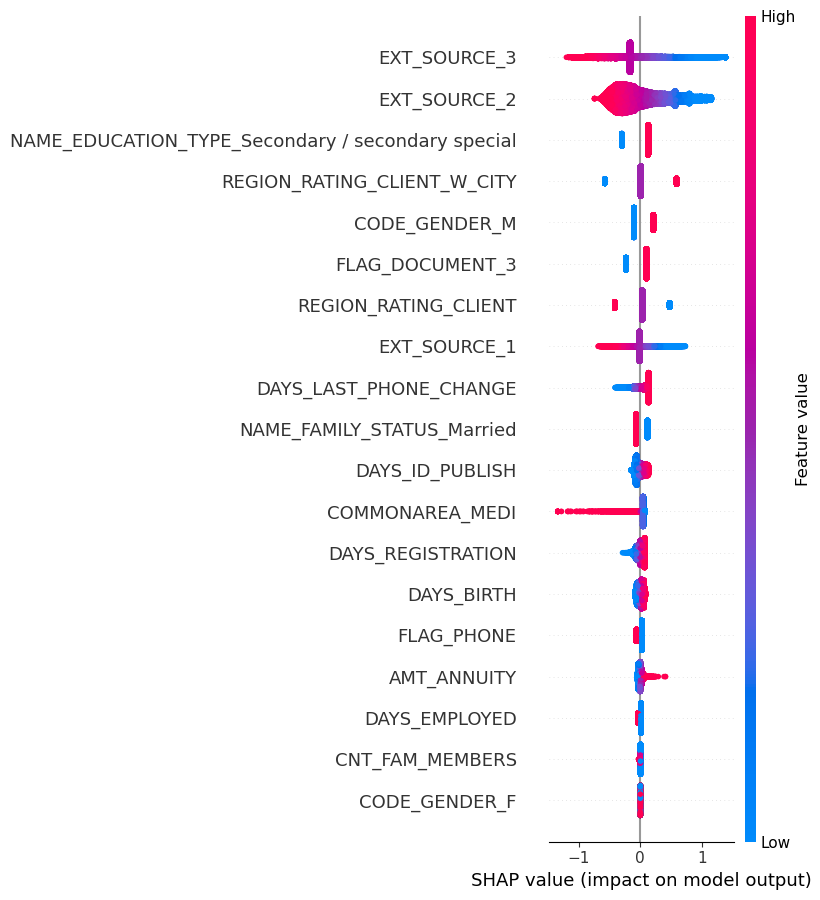

In [ ]:
# Graficar los valores SHAP
shap.summary_plot(shap_values, X_test_selected)

Antes de realizar el análiis global de SHAP, se debe aclarar que al utilizar esta técnica para interpretar modelos de machine learning, **estamos hablando de probabilidades y no de hechos concretos**. Los valores SHAP nos proporcionan una visión de cómo cada característica afecta la probabilidad de un resultado, en lugar de garantizar que dicho resultado ocurra. Por ejemplo, un alto valor SHAP para una característica indica que aumenta la probabilidad de un evento, pero no asegura que ese evento sucederá con certeza.

**Valores SHAP:**

Los valores SHAP muestran cuánto y en qué dirección cada característica influye en la predicción del modelo.

1. Positivo: indica que la característica aumenta la probabilidad de que el cliente no pague el préstamo.

2. Negativo: indica que la característica disminuye la probabilidad de que el cliente no pague el préstamo.

- EXT_SOURCE_3 y EXT_SOURCE_2: son fuentes externas de datos que parecen tener una gran influencia en la predicción. Valores altos (en rojo) de estas características parecen estar asociados con un mayor riesgo de no pagar el préstamo.

- NAME_EDUCATION_TYPE_Secondary / secondary special: la educación secundaria también es una característica significativa. Valores altos en esta característica pueden estar correlacionados con un menor riesgo de no pagar.

- REGION_RATING_CLIENT_W_CITY: la calificación de la región del cliente tiene un impacto notable. Dependiendo del valor, puede aumentar o disminuir el riesgo de no pagar.

- CODE_GENDER_M: el género del cliente también afecta las predicciones. En este caso, ser hombre (CODE_GENDER_M con valores más altos en rojo) podría estar relacionado con un mayor riesgo de no pagar.

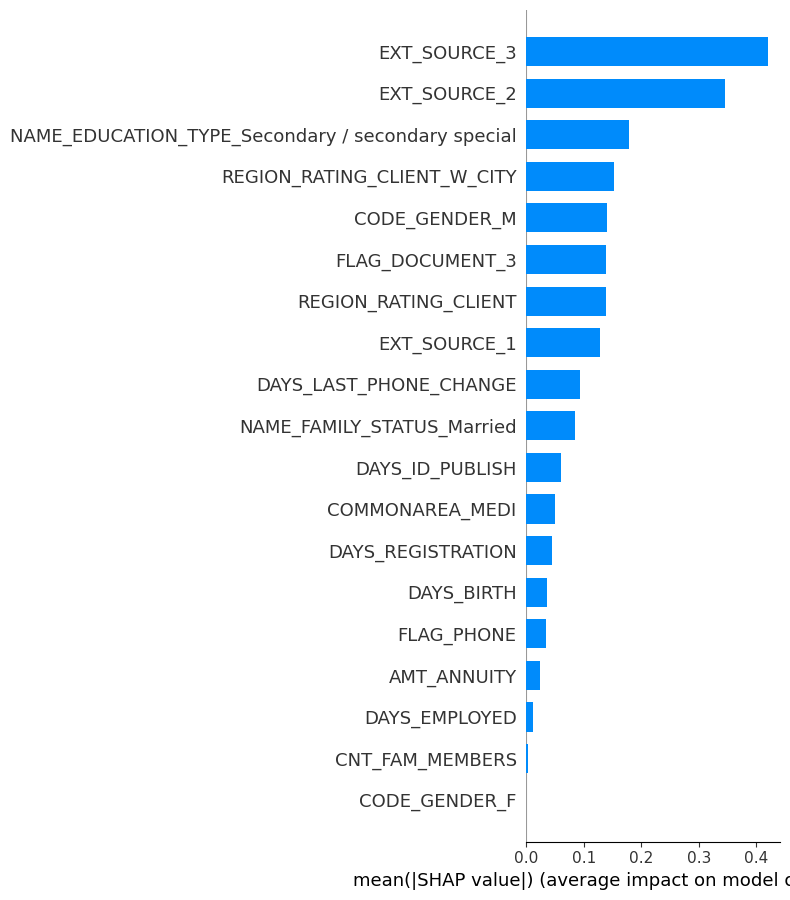

In [ ]:
shap.summary_plot(shap_values, X_test_selected, plot_type="bar")

Este gráfico muestra otro anaálisis global en forma de diagramas de barras. Nos aporta la misma información que el primero pero decido incluirlo para poder observarlo de una manera alternativa. 

# Conclusiones

En este proyecto, nos propusimos mejorar la predicción de incumplimiento de préstamos mediante un análisis y preparación exhaustivos de nuestro conjunto de datos usando diversas técnicas.

Primero, realizamos el **encoding** de variables categóricas y el **scaling** de características para asegurar que los datos estuvieran correctamente preparados para el modelado. Posteriormente, efectuamos una **selección de variables** a través de métodos como **PCA**, **Lasso**, importancia de características mediante **RandomForest** y por último, **Boruta**. Además, aplicamos **SMOTE** para balancear las clases, asegurando que nuestro modelo maneje efectivamente los datos desbalanceados.

Tras evaluar múltiples modelos, seleccionamos la **regresión logística** debido a su superioridad en recall, que es crucial para identificar con precisión a los clientes de alto riesgo. Finalmente, nos enfocamos en la explicabilidad del modelo para asegurar transparencia y comprender los factores que impulsan nuestras predicciones.

Los próximos pasos incluyen la **productivización del modelo** mediante la creación de una API con **Flask**, su dockerización para facilitar el despliegue, y la realización de pruebas locales antes de su implementación en un entorno de producción.